# Python for Machine Learning

### *Session \#4*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Logistic Regression

### Warm Ups

*Type the given code into the cell below*

---

In [1]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError, \
                                   ROCAUC, PrecisionRecallCurve
from yellowbrick.target import class_balance

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/patricks1/'
    'noble-machine-learning/master/Session4/heart_attack.csv'
)

In [3]:
def assign_tts(df, model, tgt_txt, features='all', state=None):
    if features == 'all':
        X=df.drop(columns=[tgt_txt])
    elif isinstance(features, list):
        X=df[features]
    else:
        raise ValueError('Features should either be \'all\' or a list')
    y=df[tgt_txt]
    tts = train_test_split(X,y, random_state=state)
    model.X_train = tts[0]
    model.X_test = tts[1]
    model.y_train = tts[2]
    model.y_test = tts[3]
    return None
def std_fit(model):
    model.fit(model.X_train, model.y_train)
    return None
def std_predict(model):
    return model.predict(model.X_test)
def std_score(model):
    return model.score(model.X_test, model.y_test)

**Create and fit classifier**:

In [4]:
modelI = LogisticRegression()
assign_tts(df, modelI, 'heart_attack', features=['sys_bp'], state=1)
std_fit(modelI)

**Use model to classify**:

In [5]:
print('number of predicted heart attacks: {0:0.0f}\n' \
      .format(std_predict(modelI).sum()))
display(std_predict(modelI))

number of predicted heart attacks: 10



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Use model to get probabilities**: `model.predict_proba(X_test)`

In [6]:
modelI.predict_proba(modelI.X_test)

array([[0.54863151, 0.45136849],
       [0.92053876, 0.07946124],
       [0.87329192, 0.12670808],
       ...,
       [0.9147992 , 0.0852008 ],
       [0.8879241 , 0.1120759 ],
       [0.89877654, 0.10122346]])

### Exercises
---
**Use the following `x` and `y` variables in your analysis for this section.**

In [7]:
x = modelI.X_test['sys_bp']
y = modelI.y_test

**1. Calculate the log odds of someone having a heart attack based on systolic blood pressure assuming the equation for log odds has a slope of 0.01 and an intercept of -1** 

In [8]:
log_odds = x * 0.01 - 1.

**2. Now convert those log odds into probabilities of having a heart attack.**

In [9]:
probs = 1. / (1. + np.exp(-log_odds))

**3. For people who had a heart attack, the log likelihood of the data (i.e. having a heart attack) given our model is the log probabilty. For people who did not have a heart attack, the log likelihood of the data (i.e. not having a heart attack) given our model is log(1 - the probability).**
\begin{equation}
\log\mathcal{L} = 
\begin{cases} 
\log p(\mathrm{heart\ attack}) & \text{if } \mathrm{heart\ attack}=1 \\
\log(1-p(\mathrm{heart\ attack})) & \text{if } \mathrm{heart\ attack}=0 
\end{cases}
\end{equation}

- **Create an array of log likelihoods based on the logic above.**  
(You can use `np.log` to find logs.)
- **Sum the individual log likelihoods to find the total log likelihood of the data given our model.**

In [10]:
no_attack = y == 0
likelihoods = probs.copy()
likelihoods[no_attack] = 1. - probs[no_attack]
log_likelihoods = np.log(likelihoods)
log_likelihood = np.sum(log_likelihoods)
print('Log likelihood = {0:0.1f}'.format(log_likelihood))

Log likelihood = -740.4


**4. Put your work from Exercises 1-3 into a function that takes a `coef` and `intercept` as arguments.** 

- Assume that anyone with a probability of a heart attack greater than 0.5 does have one. 
- Build on what you have by calculating your model's recall, which is the percentage of heart attacks that you correctly predicted. It is calculated as follows.  
$\mathrm{Recall = \dfrac{true\ positives}{true\ positives + false\ negatives}}$  

(A "positive" is a heart attack. A "negative" is no heart attack.)

- Also have your function calculate your model's accuracy, which is the percentage of predictions it got right.  
(Hint: You can turn a `pd.Series` of booleans into integers with `series.astype(int)`.)

In [11]:
def evaluate(coef, intercept):
    x = modelI.X_test['sys_bp']
    y = modelI.y_test
    
    log_odds = x * coef + intercept
    
    probs = 1. / (1. + np.exp(-log_odds))
    
    no_attack = y == 0
    attack = ~no_attack
    
    likelihoods = probs.copy()
    likelihoods[no_attack] = 1. - probs[no_attack]
    log_likelihoods = np.log(likelihoods)
    log_likelihood = np.sum(log_likelihoods)
    print('Log likelihood = {0:0.1f}'.format(log_likelihood))

    tp = np.sum(attack & (probs > 0.5))
    fn = np.sum(attack & (probs <= 0.5))
    print('Recall = {0:0.04f}'.format(tp / (fn + tp)))

    predictions = probs > 0.5
    correct = predictions == y
    print('Accuracy = {0:0.10f}'.format(np.mean(correct)))
    
    return None

evaluate(0.01, -1.)

Log likelihood = -740.4
Recall = 0.9925
Accuracy = 0.1630196937


**5. Now add to your function so that it plots the systolic blood pressure data and the heart attack data along with your predicted probabilities.**

Log likelihood = -740.4
Recall = 0.9925
Accuracy = 0.1630196937


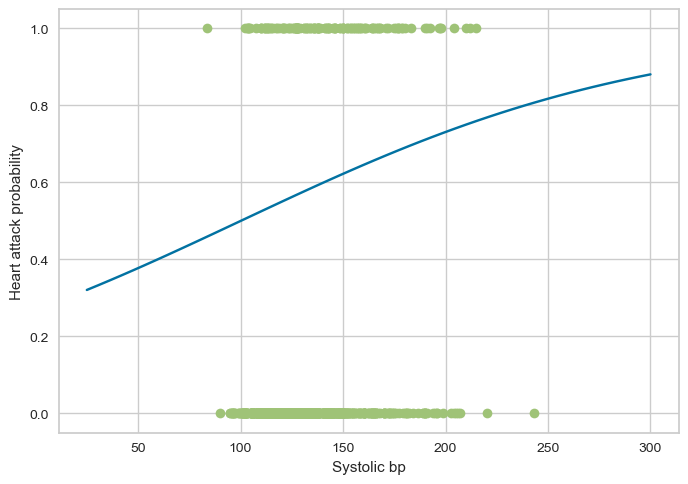

In [12]:
def evaluate(coef, intercept):
    
    x = modelI.X_test['sys_bp']
    y = modelI.y_test
    
    def calc_probs(coef, intercept, bp):
        log_odds = bp * coef + intercept
        probs = 1. / (1. + np.exp(-log_odds))
        return probs
    
    probs = calc_probs(coef, intercept, x)
    
    no_attack = y == 0
    attack = ~no_attack
    
    likelihoods = probs.copy()
    likelihoods[no_attack] = 1. - probs[no_attack]
    log_likelihoods = np.log(likelihoods)
    log_likelihood = np.sum(log_likelihoods)
    print('Log likelihood = {0:0.1f}'.format(log_likelihood))

    tp = np.sum(attack & (probs > 0.5))
    fn = np.sum(attack & (probs <= 0.5))
    print('Recall = {0:0.04f}'.format(tp / (fn + tp)))

    predictions = probs > 0.5
    correct = predictions == y
    print('Accuracy = {0:0.10f}'.format(np.mean(correct)))
    
    
    x_demo = np.linspace(25., 300., 50)    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y, 'go')
    ax.plot(x_demo, calc_probs(coef, intercept, x_demo), 'b-')
    ax.set_ylabel('Heart attack probability')
    ax.set_xlabel('Systolic bp')
    plt.show()
    
    return None

evaluate(0.01, -1.)

**6. Make adjustments to your slope and intercept to try and manually maximize the log likelihood.**

Log likelihood = -414.4
Recall = 0.1866
Accuracy = 0.8304157549


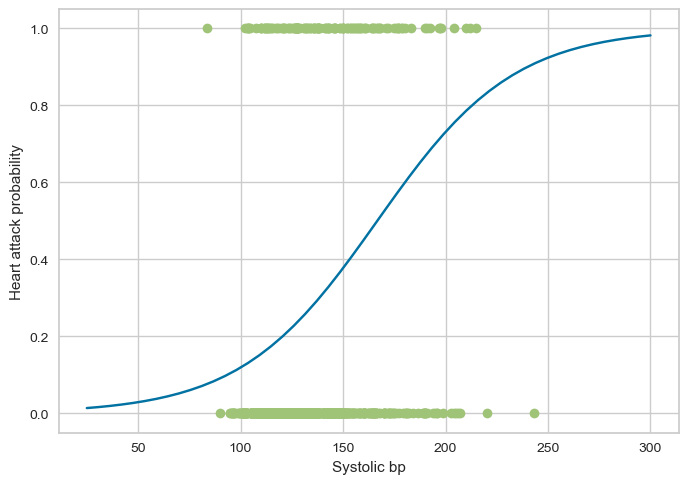

In [13]:
evaluate(0.03, -5.)

**7. Now give your function the best possible coefficient and intercept that** `sklearn` **found when we ran the logistic regression fit for** `modelI` **in the warmups.**  
Remember that the model's `coef_` is a 2D numpy array. The two-dimensional nature of the `coef_` will probably cause problems for you unless you deal with that somehow.

Log likelihood = -364.3
Recall = 0.0299
Accuracy = 0.8512035011


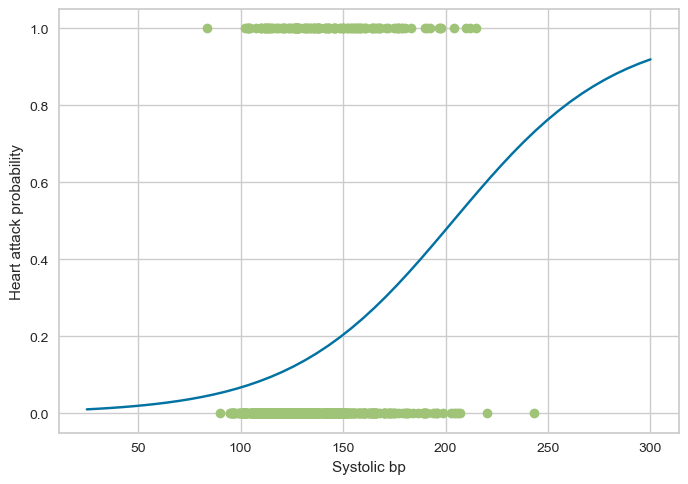

In [14]:
evaluate(modelI.coef_[0], modelI.intercept_)

**Some extra interesting stuff**

Log likelihood = -377.5
Recall = 0.0000
Accuracy = 0.8533916849


/Users/patrick/miniconda3/envs/p4ds/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


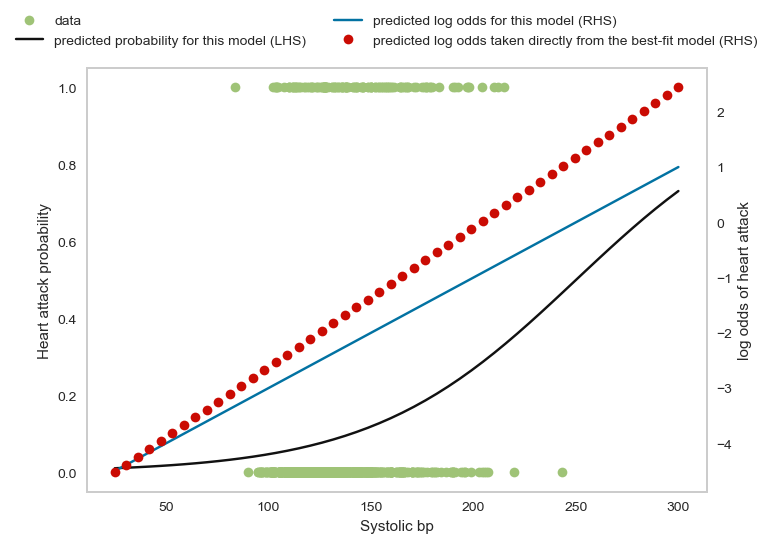

Log likelihood = -365.8
Recall = 0.0299
Accuracy = 0.8501094092


/Users/patrick/miniconda3/envs/p4ds/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


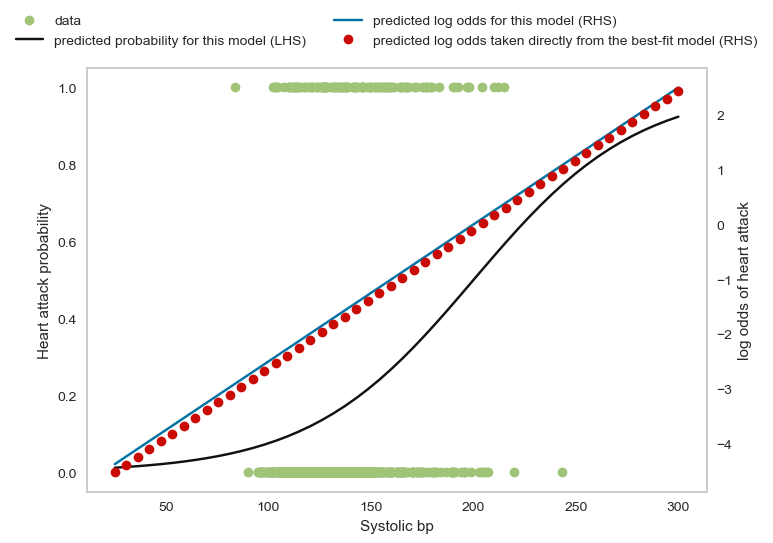

Log likelihood = -364.3
Recall = 0.0299
Accuracy = 0.8512035011


/Users/patrick/miniconda3/envs/p4ds/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


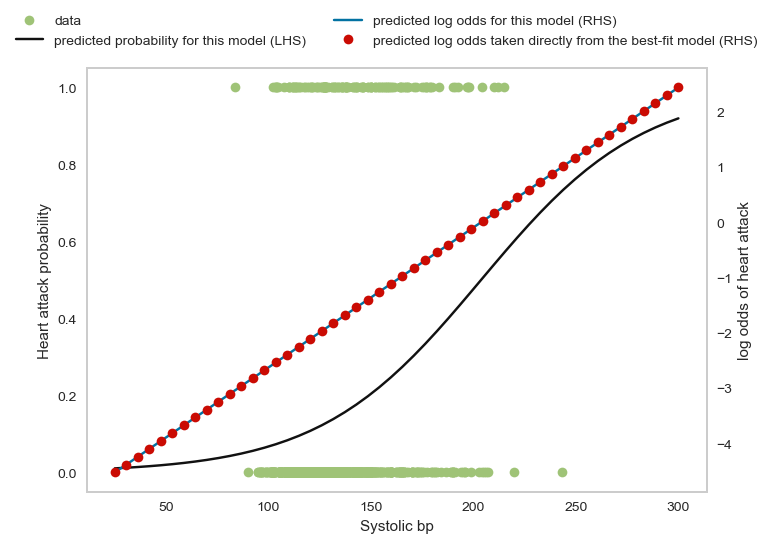

In [15]:
def evaluate(coef, intercept):
    
    x = modelI.X_test['sys_bp']
    y = modelI.y_test
    
    def calc_probs(coef, intercept, bp):
        log_odds = bp * coef + intercept
        probs = 1. / (1. + np.exp(-log_odds))
        return probs
    
    probs = calc_probs(coef, intercept, x)
    
    no_attack = y == 0
    attack = ~no_attack
    
    likelihoods = probs.copy()
    likelihoods[no_attack] = 1. - probs[no_attack]
    log_likelihoods = np.log(likelihoods)
    log_likelihood = np.sum(log_likelihoods)
    print('Log likelihood = {0:0.1f}'.format(log_likelihood))

    tp = np.sum(attack & (probs > 0.5))
    fn = np.sum(attack & (probs <= 0.5))
    print('Recall = {0:0.04f}'.format(tp / (fn + tp)))

    predictions = probs > 0.5
    correct = predictions == y
    print('Accuracy = {0:0.10f}'.format(np.mean(correct)))
    
    
    x_demo = np.linspace(25., 300., 50)    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y, 'go', label='data')
    ax.plot(
        x_demo, 
        calc_probs(coef, intercept, x_demo), 
        'k-', 
        label='predicted probability for this model (LHS)'
    )
    ax.set_ylabel('Heart attack probability')
    ax.set_xlabel('Systolic bp')
    
 
    model_probs = np.array(
        [b for a,b in modelI.predict_proba(x_demo.reshape(-1, 1))]
    )
    model_log_odds = np.log(model_probs / (1. - model_probs))
    ax2 = ax.twinx()
    ax2.plot(
        x_demo, 
        x_demo * coef + intercept, 
        label='predicted log odds for this model (RHS)'
    )
    ax2.plot(
        x_demo, 
        model_log_odds, 
        'ro', 
        label='predicted log odds taken directly from the best-fit model (RHS)'
    )
    ax2.set_ylabel('log odds of heart attack')
    
    ax.grid(False)
    ax2.grid(False)
    fig.legend(bbox_to_anchor=(0.5, 1.), ncol=2, loc='upper center')
    
    plt.show()
    
    return None

evaluate(0.02, -5.)
evaluate(0.025, -5.)
evaluate(modelI.coef_[0], modelI.intercept_)

## II. ROC Curves and Class Imbalance

### Warm Ups

*Type the given code into the cell below*

---

**Create and fit classifier**: 
```python
model_roc = ROCAUC(model)
model_roc.fit(X_train, y_train)
model_roc.score(X_test, y_test)
model_roc.show()
```

/Users/patrick/miniconda3/envs/p4ds/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


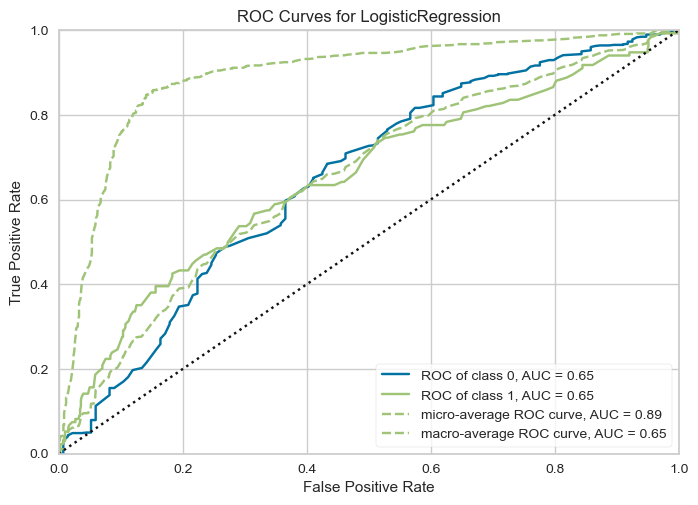

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [16]:
model_rocIIw = ROCAUC(modelI)
std_fit(model_rocIIw)
std_score(model_rocIIw)
model_rocIIw.show()

#micro-avg: (tp0 + tp1) / (tp0 + tp1 + fn0 + fn1)
#macro-avg: [tp0 / (tp0 + fp0) + tp1 / (tp1 + fp1)] / 2

**Create ClassBalance visualization:** `class_balance(y)`

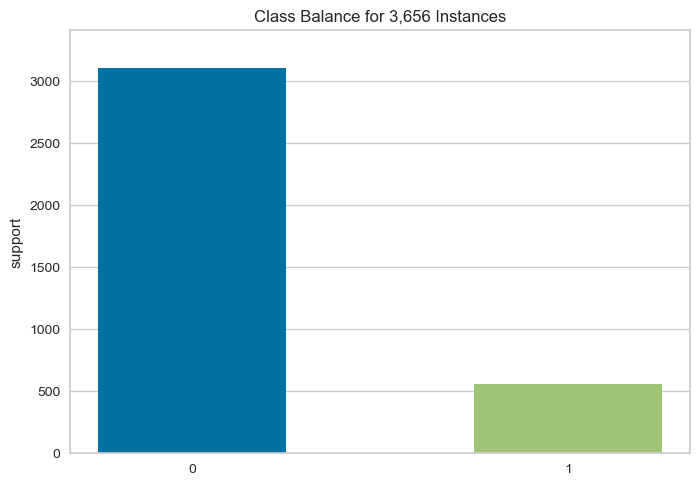

ClassBalance(ax=<Axes: title={'center': 'Class Balance for 3,656 Instances'}, ylabel='support'>)

In [17]:
class_balance(df['heart_attack'])

**Create and fit classifier**: 
```python
model_prc = PrecisionRecallCurve(model)
model_prc.fit(X_train, y_train)
model_prc.score(X_test, y_test)
model_prc.show()
```

/Users/patrick/miniconda3/envs/p4ds/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


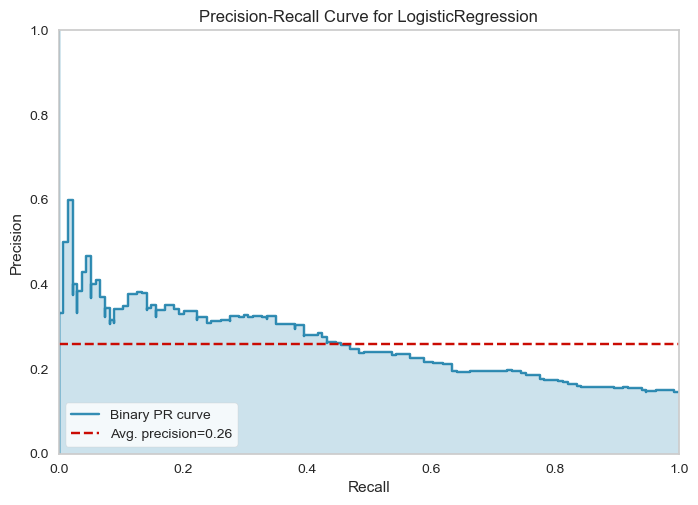

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [18]:
model_prcIIw = PrecisionRecallCurve(modelI)
std_fit(model_prcIIw)
std_score(model_prcIIw)
model_prcIIw.show()

### Exercises
---

**1. Interpret the ROC curve below. What is the highest sensitivity we can reach while keeping false positives under 20% (ie. specificity > 0.8)?**

**If we care about both classes equally, what sensitivity and specificity should we choose?**

![image.png](../images/roc.png)

**2. If you were creating a machine learning model to catch credit card fraud, would you use an ROC curve or a precision-recall curve?**

In [19]:
# Precision-recall, because fraud data is HIGHLY imbalanced.

**3. Train and plot an ROC curve with a** `KNeighborsClassifier` **model and a** `LogisticRegression` **model. Which model performs better with this data, according to the AUC?** 

Hint: To help deal with limited data, you may need to pass `max_iter=10000` when creating your LogisticRegression model

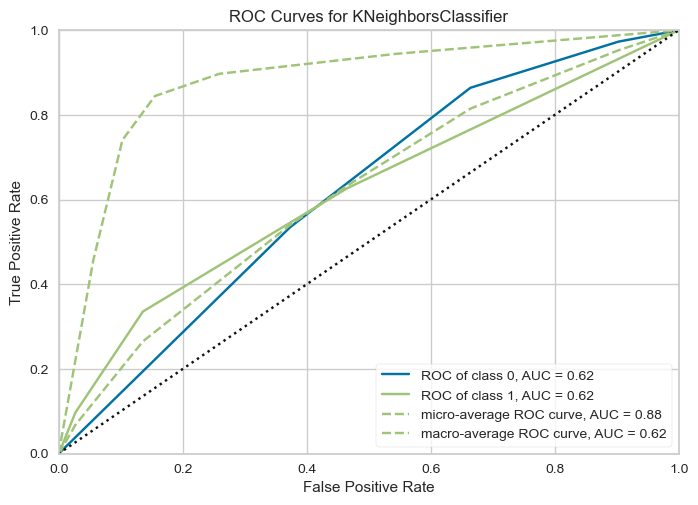

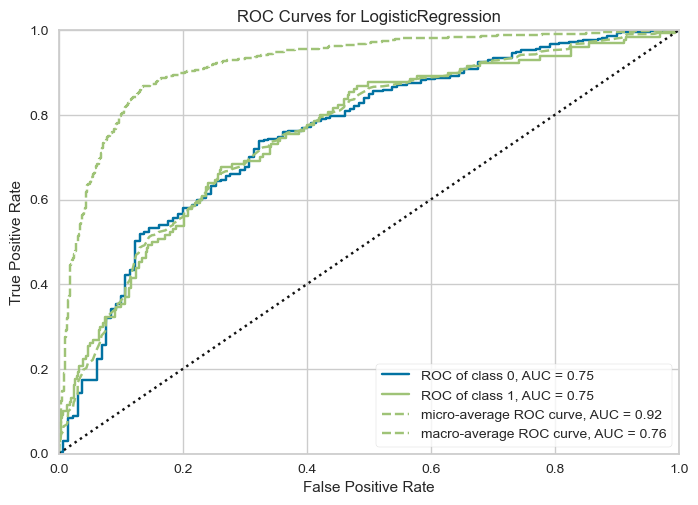

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [20]:
knn = ROCAUC(KNeighborsClassifier())
assign_tts(df, knn, tgt_txt='heart_attack', state=1)
std_fit(knn)
std_score(knn)
knn.show()

log = ROCAUC(LogisticRegression(max_iter=int(1e4)), state=1)
assign_tts(df, log, tgt_txt='heart_attack')
std_fit(log)
std_score(log)
log.show()

In [21]:
print('number of heart attacks predicted: {0:0.0f}\n' \
      .format(std_predict(log).sum()))
display(std_predict(log))

number of heart attacks predicted: 15



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**4. Do the same thing but replace the** `ROCAUC` **visualizers with** `PrecisionRecallCurve` **visualizers and rerun to get a minority-class focused view on performance.**

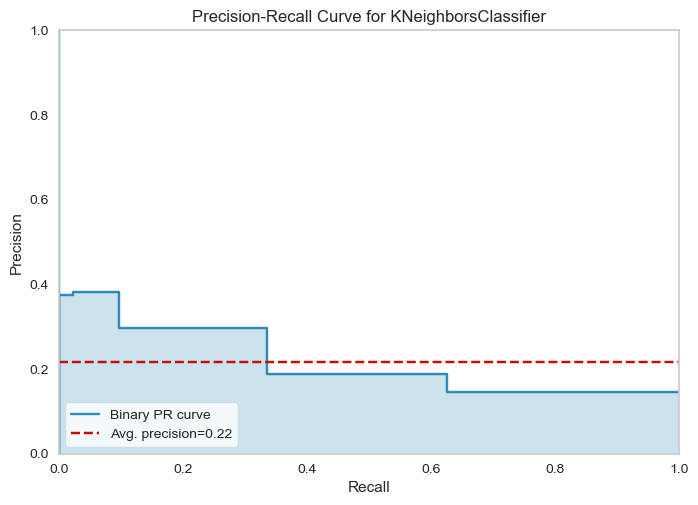

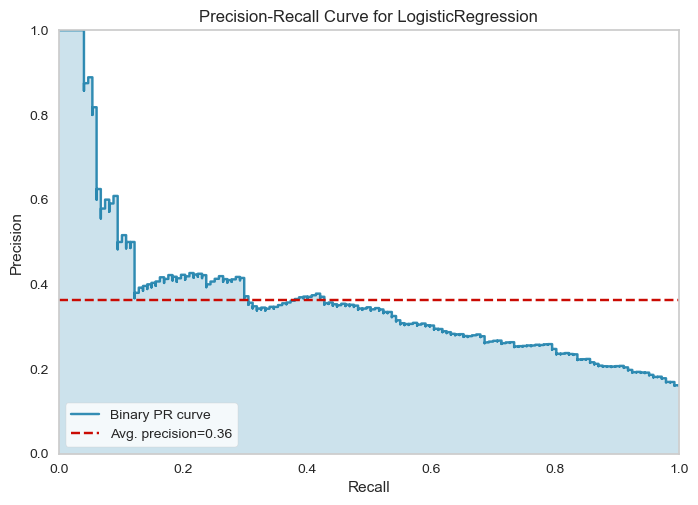

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [22]:
knn_II5 = PrecisionRecallCurve(KNeighborsClassifier())
assign_tts(df, knn_II5, tgt_txt='heart_attack', state=1)
std_fit(knn_II5)
std_score(knn_II5)
knn_II5.show()

log_II5 = PrecisionRecallCurve(LogisticRegression(max_iter=int(1e4)))
assign_tts(df, log_II5, tgt_txt='heart_attack')
std_fit(log_II5)
std_score(log_II5)
log_II5.show()

**5. Let's examine more severe class imbalance.**

**Run the code below to drop most of the positive cases, then split the data into X and y again**

**Create a** `class_balance` **visualization to verify that the classes are now very imbalanced.**

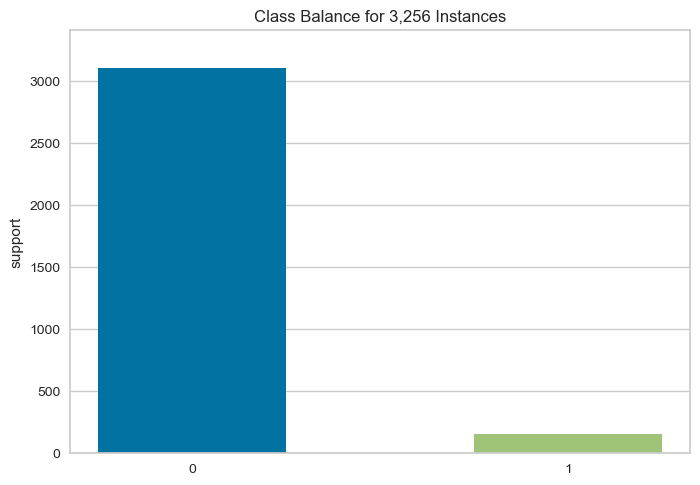

ClassBalance(ax=<Axes: title={'center': 'Class Balance for 3,256 Instances'}, ylabel='support'>)

In [23]:
df_drop = pd.read_csv('heart_attack.csv')
df_drop.drop(df_drop.query('heart_attack == 1').sample(n=400).index, inplace=True)
class_balance(df_drop['heart_attack'])

**6. Rewrite and run code similar to that which you wrote for Question 3, but this time use `df_drop` as your data source. Which model's performance has suffered more? Why?**

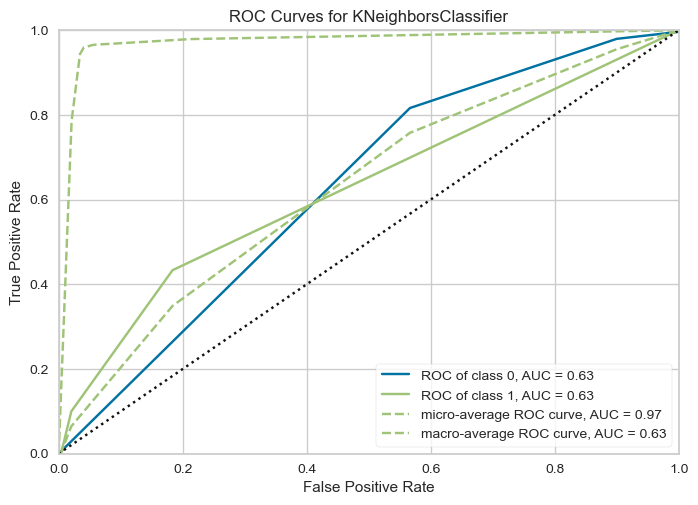

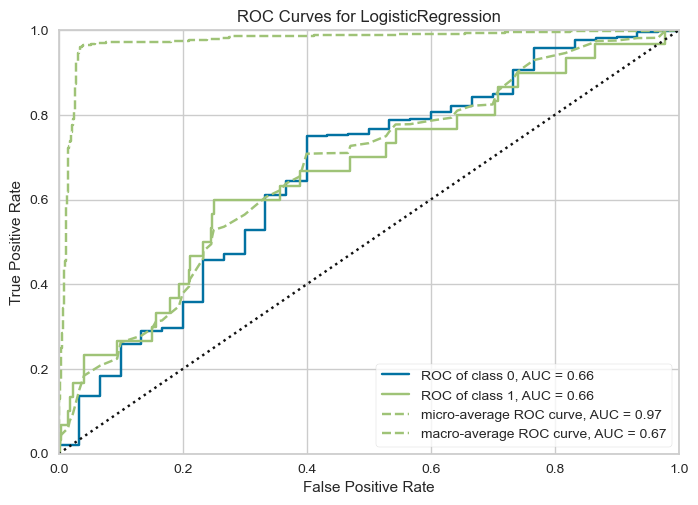

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [24]:
knn_drop_rocauc = ROCAUC(KNeighborsClassifier())
assign_tts(df_drop, knn_drop_rocauc, tgt_txt='heart_attack', state=1)
std_fit(knn_drop_rocauc)
std_score(knn_drop_rocauc)
knn_drop_rocauc.show()

log_drop_rocauc = ROCAUC(LogisticRegression(max_iter=10000))
assign_tts(df_drop, log_drop_rocauc, tgt_txt='heart_attack', state=1)
std_fit(log_drop_rocauc)
std_score(log_drop_rocauc)
log_drop_rocauc.show()

**7. Do the same thing but replace the** `ROCAUC` **visualizers with** `PrecisionRecallCurve` **visualizers and rerun to get a minority-class focused view on performance.**

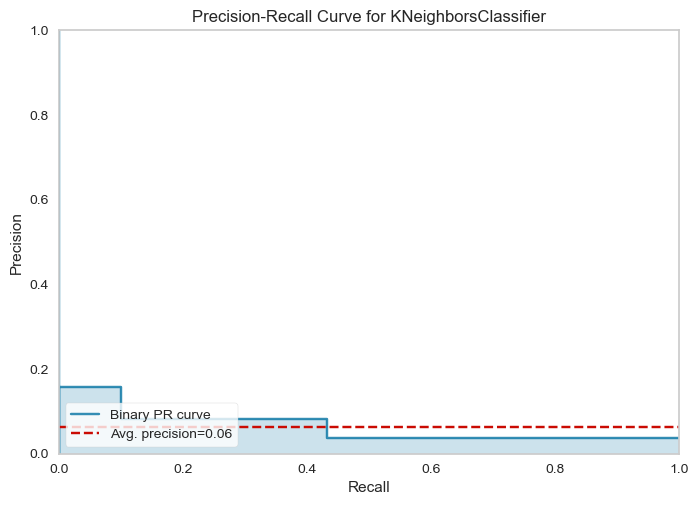

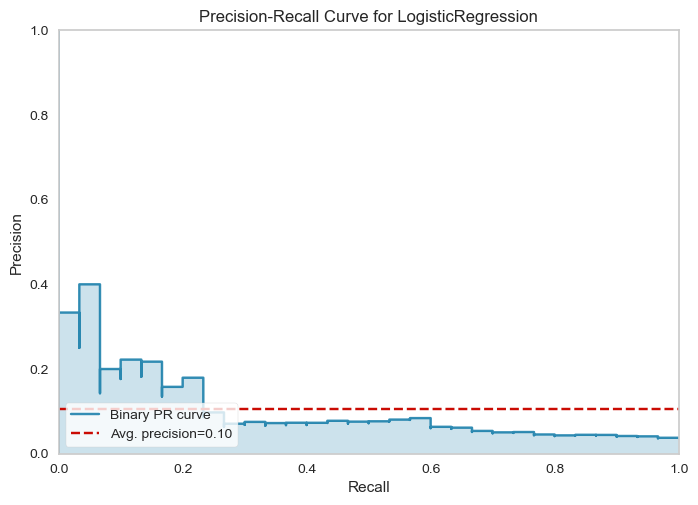

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [25]:
knn_drop_pr = PrecisionRecallCurve(KNeighborsClassifier())
assign_tts(df_drop, knn_drop_pr, tgt_txt='heart_attack', state=1)
std_fit(knn_drop_pr)
std_score(knn_drop_pr)
knn_drop_pr.show()

log_drop_pr = PrecisionRecallCurve(LogisticRegression(max_iter=10000))
assign_tts(df_drop, log_drop_pr, tgt_txt='heart_attack', state=1)
std_fit(log_drop_pr)
std_score(log_drop_pr)
log_drop_pr.show()

The bottom plot says if you want ~50% - 60% of your guesses to be right, you need to accept that you only capture 10% of all positive cases.

Precision-recall has taken a massive hit for both models, but logistic regression fared marginally better.

## III. Stratified Sampling and Oversampling

### Warm Ups

*Type the given code into the cell below*

---

**Use stratified sampling:**
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
```

In [26]:
tts3i = train_test_split(df.drop(columns=['heart_attack']), 
                         df['heart_attack'], 
                         stratify=df['heart_attack'])

**Use RandomOverSampler to balance data:**
```python
sampler = RandomOverSampler()
sampler.fit_resample(X_train, y_train)
```

In [27]:
print(len(df))

sampler = RandomOverSampler()
sampler.fit_resample(tts3i[0], tts3i[2])

3656


(      male  age  education  current_smoker  cigs_per_day  bp_meds  \
 0        1   44        4.0               0           0.0      0.0   
 1        0   52        2.0               0           0.0      0.0   
 2        1   63        1.0               0           0.0      0.0   
 3        1   44        2.0               0           0.0      0.0   
 4        0   42        3.0               1          15.0      0.0   
 ...    ...  ...        ...             ...           ...      ...   
 4643     1   63        3.0               1          20.0      0.0   
 4644     1   53        1.0               1          11.0      1.0   
 4645     1   42        3.0               1          25.0      0.0   
 4646     0   56        1.0               0           0.0      0.0   
 4647     1   66        3.0               0           0.0      0.0   
 
       prevalent_stroke  prevalent_hyp  diabetes  tot_chol  sys_bp  dia_bp  \
 0                    0              0         0     175.0   104.0    78.0   
 1

**Use RandomOverSampler in pipeline:**
```python
model = make_pipeline(RandomOverSampler(), LogisticRegression())
```

### Exercises
---

**1. Inside the for-loop, call** `train_test_split()` **WITHOUT the stratify parameter**

**Then within the for-loop call** `y_test.sum()` **to count the number of positive cases.**

In [28]:
for i in range(10):
    
    # Add your code here
    tts31 = train_test_split(df.drop(columns=['heart_attack']), 
                             df['heart_attack'], 
                             stratify=None)
    print('False cases: '+str(tts31[3].count() - tts31[3].sum()))
    print('Positive cases: '+str(tts31[3].sum()))
    print('')

False cases: 782
Positive cases: 132

False cases: 769
Positive cases: 145

False cases: 765
Positive cases: 149

False cases: 789
Positive cases: 125

False cases: 770
Positive cases: 144

False cases: 771
Positive cases: 143

False cases: 769
Positive cases: 145

False cases: 790
Positive cases: 124

False cases: 775
Positive cases: 139

False cases: 777
Positive cases: 137



Notice the variance in number of positive cases above.

**Rerun with the stratify parameter set to** `y`

In [29]:
for i in range(10):
    
    # Add your code here
    tts31_strat = train_test_split(df.drop(columns=['heart_attack']), 
                                   df['heart_attack'], 
                                   stratify=df['heart_attack'])
    print('False cases: '+str(tts31_strat[3].count() - tts31_strat[3].sum()))
    print('Positive cases: '+str(tts31_strat[3].sum()))
    print('')

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139

False cases: 775
Positive cases: 139



Notice the consistence in number of positive cases above.

**2. Create a** `RandomOverSampler()` **and use .fit_resample() on X_train and y_train**

**This will return two arrays -- the rebalanced versions of** `X_train` **and** `y_train` 

**Take the mean of the new** `y_train` **to show that it's balanced**

In [30]:
print(tts31_strat[2].mean()) #previous portion of positive cases
ros = RandomOverSampler()
new_X_train, new_y_train = ros.fit_resample(tts31_strat[0], tts31_strat[2])
print(new_y_train.mean()) #new portion of positive cases

0.15244347191830782
0.5


**3. Fit a** `LogisticRegression()` **model to the training data, and use it to plot a ConfusionMatrix**

**What is the accuracy and sensitivity of the model?**

Accuracy: 0.8566739606126915
Sensitivity: 0.08208955223880597


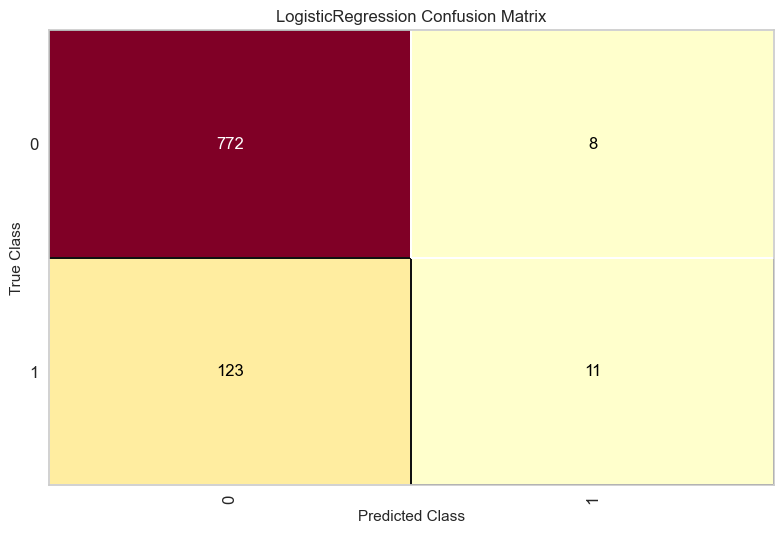

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [31]:
log33 = ConfusionMatrix(LogisticRegression(max_iter=10000))
assign_tts(df, log33, tgt_txt='heart_attack', state=1)
std_fit(log33)
# Accuracy is percentage of samples correctly identified.
print('Accuracy: '+str(std_score(log33)))
# Sensitivity is the proportion of true positives that you correctly identified
# as such.
tp33 = log33.confusion_matrix_[1,1] #True positives
fn33 = log33.confusion_matrix_[1,0] #False positives
print('Sensitivity: '+str(tp33 / (tp33 + fn33)))
log33.show()

**4. Create a pipeline with a** `RandomOverSampler` **and** `LogisticRegression()` **and fit it to the training data**

**What is the accuracy and sensitivity of the new model?**

In [32]:
def eval_cm(cm):
    '''
    Evaluate a confusion matrix
    '''
    
    tp = cm[1,1] # true positives
    fp = cm[0,1] # false positives
    tn = cm[0,0] # true negatives
    fn = cm[1,0] # false negatives
    fpr = fp / (tn + fp) # false positive rate
    spec = 1. - fpr # specificity i.e. recall but for the negative class
    # Recall/sensitivity is the proportion of positive samples that you 
    # correctly
    # identified
    # as such.
    recall = tp / (tp + fn) 
    assert np.allclose([spec], [tn / (tn + fp)])
    print('Specificity: ' + str(spec) \
          + '\n    (i.e. recall/sensitivity of negative class)')
    print('Sensitivity/recall: {0:0.4f}'.format(recall))
    
    return None

Accuracy: 0.6684901531728665
Specificity: 0.6705128205128206
    (i.e. recall/sensitivity of negative class)
Sensitivity/recall: 0.6567


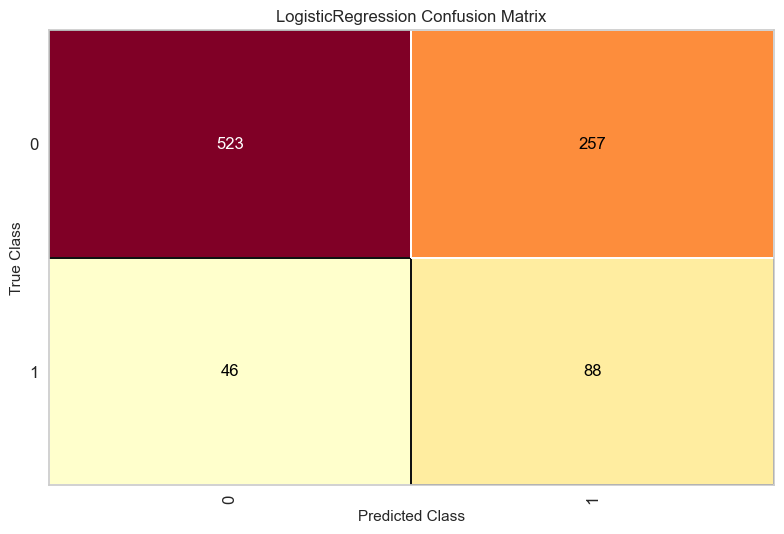

In [33]:
pipe34 = make_pipeline(RandomOverSampler(), 
                       LogisticRegression(max_iter=10000))

cm34 = ConfusionMatrix(pipe34)
assign_tts(df, cm34, tgt_txt='heart_attack', state=1)
std_fit(cm34)
print('Accuracy: '+str(std_score(cm34)))
eval_cm(cm34.confusion_matrix_)
cm34.show()
plt.show()